# Exercise 3: Understanding numpy and data structure.

## 1. Decrypt html link.

In [1]:
import numpy as np

In [2]:
dictionary = np.array(["1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "/", "-", "_", "%", "?", "\\", "*", ".", ":", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "!", "\"", "#", "$", "&", "+", "@", "|", "¨", "~"])

In [3]:
message = list("oyzxva._yf#gjj!j"+"\""+"g!!hsjquykvw:jqt\pwvftquygvdd.nhguzduvtpt.uhuvfvx.krnww!fiqrohnlx*udt!gy\8:obtdkf*tdnifh.9/bqui")

In [4]:
key = list("75683172")

In [5]:
n = 0
URL = []
for i in range(len(message)):
    for j in range(len(dictionary)):
        if (n >= len(key)):
            n = 0
        if (message[i] == dictionary[j]):
            URL.append(dictionary[j-int(key[n])])
            n = n + 1

In [6]:
print("".join(URL))

https://raw.githubusercontent.com/josemontanac/laboratorio-metodos-computacionales/master/2/lambda/lambda_33.png


## 2. Filter Lambda's image.

1. _Open the picture._

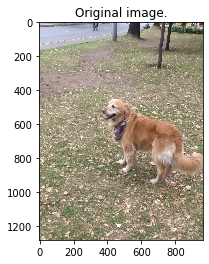

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = np.array(mpimg.imread("lambda_33.png",format="rbg"))
imgplot = plt.imshow(img)
plt.title("Original image.")
plt.show()

2. _Check the minimum and the maximum value of the picture. Does it make sense to you? Filter then all pixels that are more than  20 and less than  200. Did the picture change a lot?_

In [9]:
print("Minimum value =", np.min(img))
print("Maximum value =", np.max(img))
print("The values make sense, they are in a normal range of amplitude.")

Minimum value = 0
Maximum value = 255
The values make sense, they are in a normal range of amplitude.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


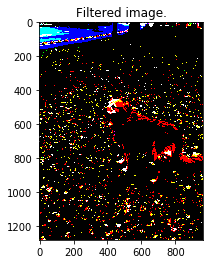

In [10]:
img2 = np.zeros(np.shape(img))

img2[:,:,0] = np.where(img[:,:,0]>20,0,img[:,:,0])
img2[:,:,0] = np.where(img[:,:,0]<200,0,img[:,:,0])
img2[:,:,1] = np.where(img[:,:,1]>20,0,img[:,:,1])
img2[:,:,1] = np.where(img[:,:,1]<200,0,img[:,:,1])
img2[:,:,2] = np.where(img[:,:,2]>20,0,img[:,:,2])
img2[:,:,2] = np.where(img[:,:,2]<200,0,img[:,:,2])

imgplot = plt.imshow(img2)
plt.title("Filtered image.")
plt.show()

If we filter the given sange of pixels, the picture changes considerably due to the large amount of pixels that are more than 20 and less than 200.

3. _Since the position of the dog varies for every picture the first operation to apply is to try to locate the position of the dog and then make square filter in order to set all pixels of the picture to 0 except the ones the dog is in the picture._

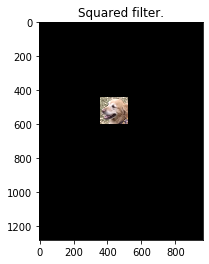

In [11]:
img3 = np.copy(img)

img3[0:440,:,:] = 0
img3[600:,:,:] = 0
img3[:,0:360,:] = 0
img3[:,520:,:] = 0

imgplot = plt.imshow(img3)
plt.title("Squared filter.")
plt.show()

4. _Followed by this you will implement a circular filter of the face of the dog, to do this first try to locate the center of its face and then implement a filter such that the circular region surrounds the face of the dog, and the rest of the pixels set them to zero._

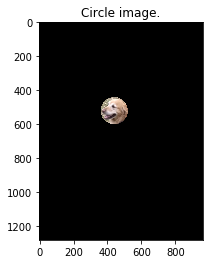

In [12]:
from scipy.spatial import distance

img4 = np.copy(img)

for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        if(distance.euclidean([i,j],[520,440])>80):
            img4[i,j,:] = 0
            
imgplot = plt.imshow(img4)
plt.title("Circle image.")
plt.show()

- Centro de la cara en (520,440)
- Radio = 80

5. _Combine the last filter and a change in the pixels. Create a new image that will have only black and white and then with the last part make a circle on the face of the dog to show the same picture as before but this time in gray scale format._

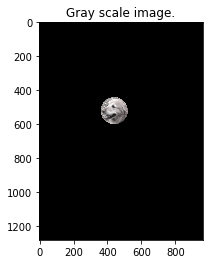

In [13]:
img5 = np.copy(img)

img5[:,:,0] = img5[:,:,0] * 0.299 + img5[:,:,1] * 0.587 + img5[:,:,2] * 0.114
img5[:,:,1] = img5[:,:,0] * 0.299 + img5[:,:,1] * 0.587 + img5[:,:,2] * 0.114
img5[:,:,2] = img5[:,:,0] * 0.299 + img5[:,:,1] * 0.587 + img5[:,:,2] * 0.114

for i in range(len(img[:,0,0])):
    for j in range(len(img[0,:,0])):
        if(distance.euclidean([i,j],[520,440])>80):
            img5[i,j,:] = 0

plt.imshow(img5,cmap="gray")
plt.title("Gray scale image.")
plt.show()